In [36]:
import os
os.getcwd(), os.listdir()

('C:\\Users\\goksut\\0_Goruntu Isleme\\median_filter',
 ['.ipynb_checkpoints', 'cameraman.jpg', 'median_filter.ipynb'])

In [37]:
path = r"C:\Users\goksut\0_Goruntu Isleme\median_filter"
file_name_with_path = path + "\cameraman.jpg"
file_name_with_path

'C:\\Users\\goksut\\0_Goruntu Isleme\\median_filter\\cameraman.jpg'

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def convert_rgb_to_gray_level(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j] = get_distance(im_1[i,j,:])
    return im_2


def get_distance(v, w = [1/3, 1/3, 1/3]):
    a, b, c = v[0], v[1], v[2]
    w1, w2, w3 = w[0], w[1], w[2]
    d = ((a**2) * w1 + (b**2) * w2 + (c**2) * w3)**.5
    # d = (a*w1)**2 + (b*w2)**2 + (c*w3)**2)**.5
    return d


def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9


def apply_mask(part_of_image):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))


def get_median_for_55(poi):
    s_1 = poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]


def get_median(poi):
    s_1 = poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]


def get_mean_filter_for_55(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range(3, m-3):
        for j in range(3, n-3):
            poi = im_1[i-2:i+3,j-2:j+3]
            im_2[i,j] = get_median_for_55(poi)
    return im_2


def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range(1, m-1):
        for j in range(1, n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            im_2[i,j] = get_median(poi)
    return im_2


def my_f_2(a):
    return int(255 - a)
my_f_2(243)

12

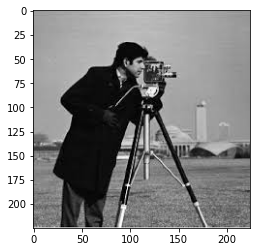

In [40]:
img_0 = plt.imread(file_name_with_path)
%matplotlib inline
plt.imshow(img_0)

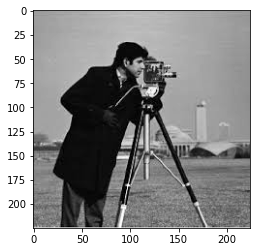

In [41]:
img_1 = convert_rgb_to_gray_level(img_0)
plt.imshow(img_1, cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x250d2071580>,
 <matplotlib.image.AxesImage at 0x250d20d6be0>)

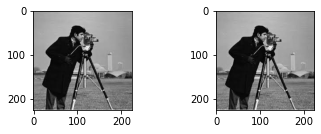

In [43]:
plt.subplot(2,2,1), plt.imshow(img_0, cmap = 'gray')
plt.subplot(2,2,2), plt.imshow(img_1, cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x250d32b61c0>,
 <matplotlib.image.AxesImage at 0x250d32fe310>)

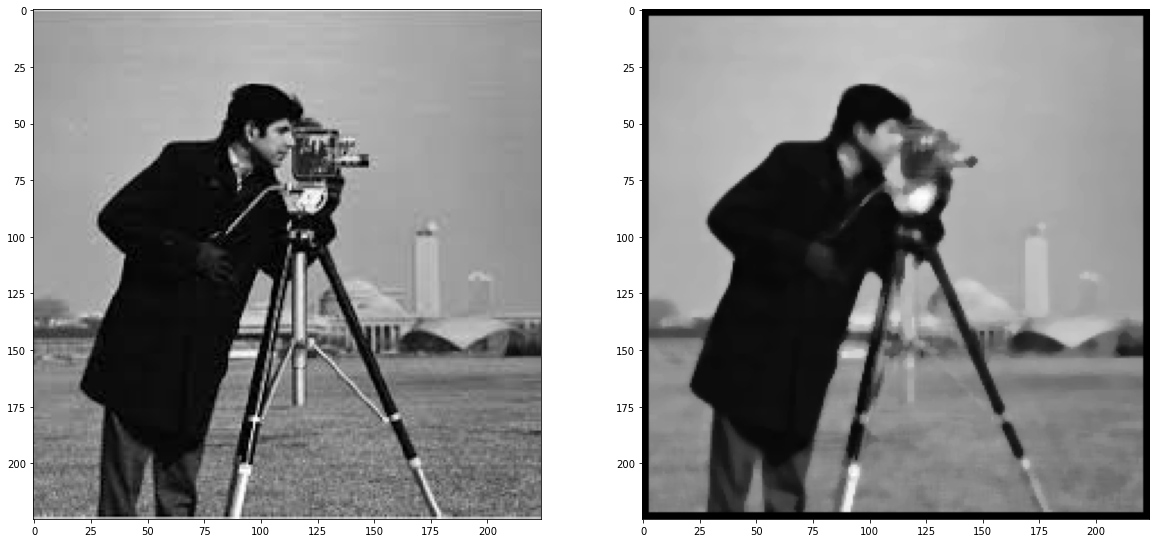

In [47]:
im_55 = get_mean_filter_for_55(img_1)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1), plt.imshow(img_1, cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(im_55, cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x250d1e639d0>,
 <matplotlib.image.AxesImage at 0x250d1f2c1c0>)

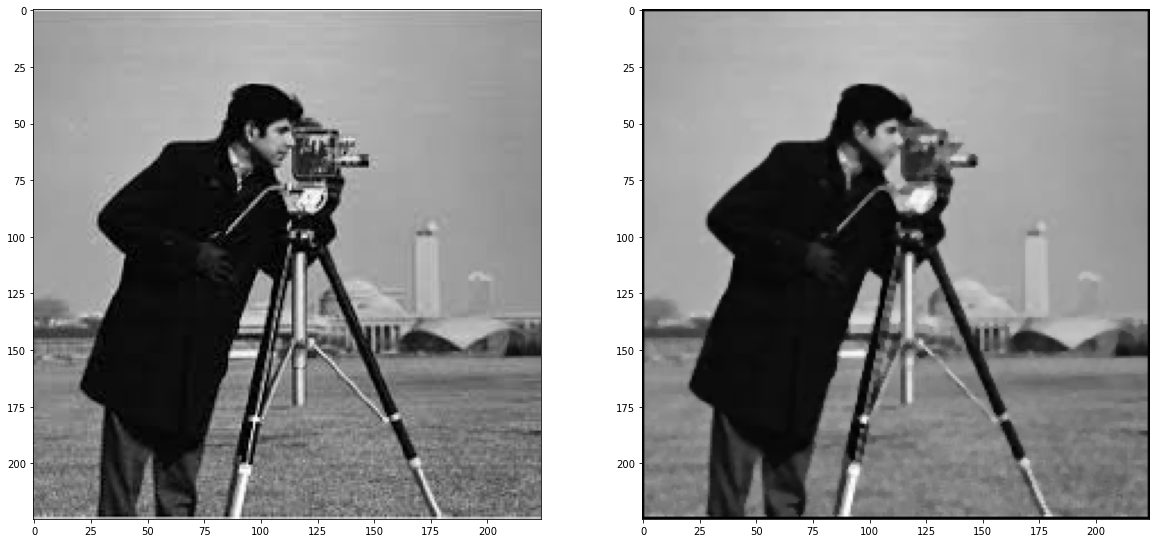

In [49]:
im_555 = get_mean_filter(img_1)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1), plt.imshow(img_1, cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(im_555, cmap = 'gray')